# Linear Regression

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/linear.png" width=250>

$\hat{y} = XW$

*where*:
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DX1}$ 

* **Objective:**  Use inputs $X$ to predict the output $\hat{y}$ using a linear model. The model will be a line of best fit that minimizes the distance between the predicted and target outcomes. Training data $(X, y)$ is used to train the model and learn the weights $W$ using stochastic gradient descent (SGD).
* **Advantages:**
  * Computationally simple.
  * Highly interpretable.
  * Can account for continuous and categorical features.
* **Disadvantages:**
  * The model will perform well only when the data is linearly separable (for classification).
  * Usually not used for classification and only for regression.
* **Miscellaneous:** You can also use linear regression for binary classification tasks where if the predicted continuous value is above a threshold, it belongs to a certain class. But we will cover better techniques for classification in future lessons and will focus on linear regression for continuos regression tasks only.



# Training


*Steps*: 
1. Randomly initialize the model's weights $W$.
2. Feed inputs $X$ into the model to receive the predictions $\hat{y}$.
3. Compare the predictions $\hat{y}$ with the actual target values $y$ using the objective (cost) function to determine loss $J$. A common objective function for linear regression is mean squarred error (MSE). This function calculates the difference between the predicted and target values and squares it (note that the $\frac{1}{2}$ is just used to simplify the derivative operation):
  * $MSE = J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2$
4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights:
  * $J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2 = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 $
  * $\frac{\partial{J}}{\partial{W}} = X(\hat{y} - y)$
4. Apply backpropagation to update the weights $W$ using a learning rate $\alpha$ and an optimization technique (e.g. stochastic gradient descent). The simplified intuition is that the gradient tells you the direction for how to increase something so subtracting it will help you go the other way since we want to decrease loss $J(\theta)$:
  * $W = W- \alpha\frac{\partial{J}}{\partial{W}}$
5. Repeat steps 2 - 5 until the model performs well.

## MSE stands for mean square error


# Data


In [5]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Arguments
args = Namespace(
    seed = 1234,
    data_file = "sameple_data.csv",
    num_samples = 100,
    train_size = 0.75,
    test_size = 0.25,
    num_epochs = 100,
)

# Set seed for reproducability
np.random.seed(args.seed)

In [7]:
# Generate synthetic data
def generate_data(num_samples):
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,10,size=num_samples)
    # np.random.uniform( low, high, sample size): Drawn samples from the parameterized uniform distribution.
    y =  3.65*X + 10 + random_noise 
    return X,y

In [9]:
X,y = generate_data(args.num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns = ['X', 'y'])
df.head()

,X,y
0,0.0,3.830389
1,1.0,16.092175
2,2.0,16.054555
3,3.0,26.657172
4,4.0,30.199516


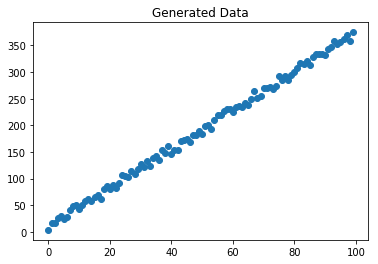

In [10]:

plt.title("Generated Data")
plt.scatter(x=df['X'],y = df['y'])
plt.show()

In [43]:
myTurn = Namespace(
    seed=133,
    num_samples = 50)

In [47]:
def gData(num):
    X = np.array(range(num))
    natural_error = np.random.uniform(-300,300, size=num)
    y = 3.14*X*X + natural_error + 50
    return X,y

## let's use A and b for X and y here
A,b = gData(myTurn.num_samples)
dat = np.vstack([A,b]).T
df = pd.DataFrame(dat, columns = ['x', 'y'])
df.head()

    
    

,x,y
0,0.0,138.468252
1,1.0,254.886657
2,2.0,-81.342988
3,3.0,-178.853469
4,4.0,-129.878993


In [48]:
df.describe()

,x,y
count,50.00000,50.000000
mean,24.50000,2611.911529
std,14.57738,2377.348537
min,0.00000,-178.853469
25%,12.25000,401.239686
50%,24.50000,1872.127917
75%,36.75000,4212.859357
max,49.00000,7827.697163


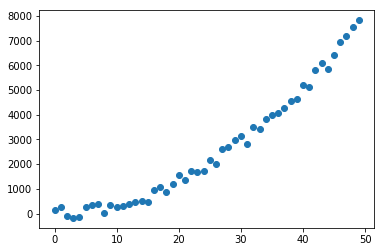

In [49]:
plt.title = 'meaningless data'
plt.scatter(x = df['x'], y = df['y'])
plt.show()

# Scikit-learn implementation

In [ ]:
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['X'].values.reshape(-1,1), df["y"], test_size=args.test_size,
    random_state = args.seed)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

In [ ]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

# Apply scaler on training and test data
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# Check
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std should be 1